In [179]:
%matplotlib inline 
import sklearn
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [130]:
df = pd.read_csv("raw_data.csv", sep=";")
df.head()

,patient_name,cell_name,cell_type,patient_state,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
0,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,86.256404,84.116425,83.269485,73.725729,69.172432,58.695397,...,345.330540,343.913899,340.570137,336.092245,329.088472,324.055107,314.110388,319.853392,335.922163,3.0
1,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,72.367814,70.946072,73.946121,69.342146,66.510280,51.961781,...,329.497317,330.293120,334.239066,336.958602,332.810752,337.041213,329.390541,317.220241,289.615842,2.0
2,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,36.107124,50.509171,61.251275,60.634079,59.005082,43.374480,...,349.773008,362.963878,377.543505,369.898047,347.525042,324.241500,304.862554,313.958545,356.180451,1.0
3,P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,malade,75.073652,57.880571,53.339291,47.543917,51.896103,40.910901,...,316.498420,323.193044,321.317859,310.282294,326.497336,339.002563,345.054206,372.404114,414.603390,2.0
4,P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,malade,51.591270,54.161436,63.649577,58.364222,61.095665,47.811723,...,324.027328,320.147621,318.339477,310.159782,313.315257,333.873758,339.270424,352.541981,351.914705,1.0


In [174]:
df["patient_state"] = df['patient_state'].map({'malade':1,'sain':0})

In [175]:
des = df.describe()
des

,patient_state,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,lambda_9,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
count,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,...,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,0.379464,60.124829,60.463136,59.888256,60.904055,63.627305,57.514653,65.687469,75.424163,91.773647,...,329.839983,334.002681,332.861314,335.071753,336.623990,339.733173,339.436016,339.784133,341.260542,1.950118
std,0.485287,19.976995,17.268393,17.920853,16.415824,13.919297,17.249238,15.680804,15.217780,14.174618,...,27.831428,27.430182,27.728478,27.978240,28.926671,29.264895,31.442279,31.467506,36.484886,0.813236
min,0.000000,-12.995530,8.440945,1.530354,5.717389,20.313871,11.445971,14.353926,30.274836,47.596634,...,200.871285,185.342734,179.166929,181.075762,171.396883,180.273545,175.537804,189.114613,162.011435,1.000000
25%,0.000000,46.904888,48.421237,47.690901,49.568899,54.488445,46.118824,54.751660,65.171660,82.026095,...,316.236211,321.961672,320.887548,322.333581,323.538601,327.182426,323.778776,325.371976,324.208602,1.000000
50%,0.000000,58.989268,59.228337,58.161755,58.895818,61.911697,55.175128,64.270404,73.845304,90.814998,...,335.135554,339.762888,338.850255,341.245106,342.813211,346.884805,345.883146,346.401326,346.924912,2.000000
75%,1.000000,71.682981,70.038529,69.733277,69.865094,70.779618,66.286946,74.490685,84.470709,100.256779,...,348.943557,352.548370,351.567056,354.435843,357.432078,360.816672,362.636769,361.816652,365.543180,3.000000
max,1.000000,154.161658,168.810197,167.825665,171.197853,160.204620,165.600060,159.633693,158.330256,158.999332,...,406.445658,401.881794,408.206418,415.210829,414.584479,423.749905,434.973547,423.668719,445.906239,3.000000


<AxesSubplot:>

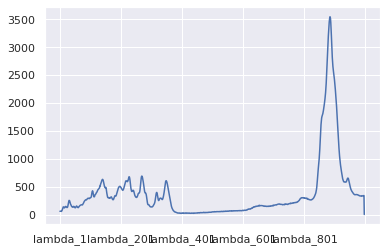

In [122]:
des.iloc[1].plot()

In [127]:
df.select_dtypes(exclude = np.number)["cell_type"].value_counts()

TNK    4289
B      2908
Name: cell_type, dtype: int64

In [132]:
df.select_dtypes(exclude = np.number)["patient_state"].value_counts()

sain      4466
malade    2731
Name: patient_state, dtype: int64

<AxesSubplot:xlabel='spectre', ylabel='Count'>

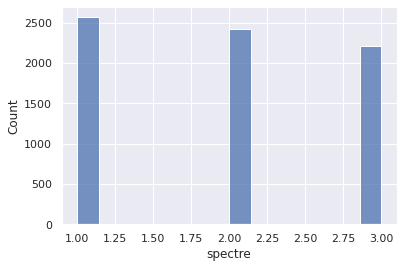

In [129]:
sns.histplot(data=df, x="spectre")


patient_name
cell_name
cell_type
patient_state


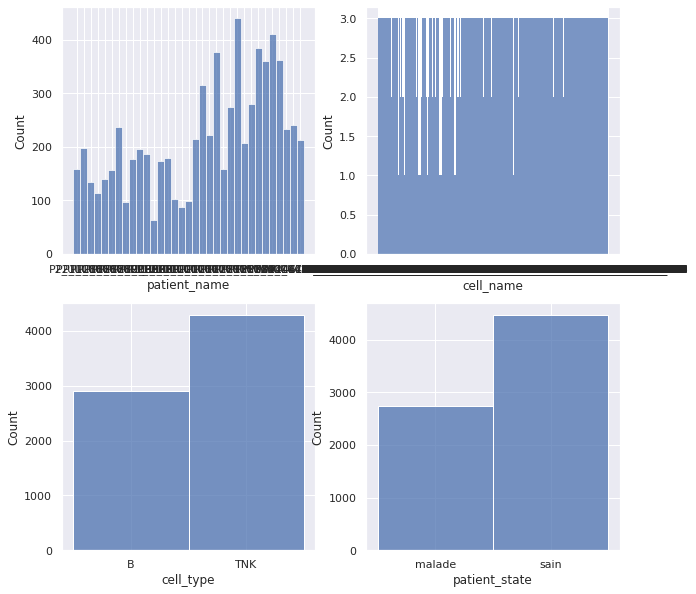

In [36]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

for ax, element in zip(axes.flat, df.select_dtypes(exclude=np.number).columns):
    print(element)
    sns.histplot(data=df, x=element, ax=ax)

plt.show()

## Feature selection

In [47]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [51]:
upper

,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,lambda_9,lambda_10,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
lambda_1,NaN,0.739673,0.477022,0.386352,0.384338,0.449180,0.476160,0.496281,0.447998,0.385411,...,0.008593,0.028510,0.006082,0.017026,0.016624,0.036278,0.008004,0.002340,0.000530,0.004529
lambda_2,NaN,NaN,0.928063,0.847514,0.698382,0.664669,0.611528,0.607982,0.537261,0.504496,...,0.079943,0.029248,0.061170,0.044521,0.043064,0.004811,0.046866,0.056763,0.060708,0.001255
lambda_3,NaN,NaN,NaN,0.959768,0.811323,0.720421,0.632319,0.602948,0.517897,0.498918,...,0.064895,0.013897,0.045134,0.031289,0.030356,0.007456,0.037317,0.047219,0.049509,0.011168
lambda_4,NaN,NaN,NaN,NaN,0.926711,0.811161,0.717321,0.650645,0.525789,0.463039,...,0.102044,0.045132,0.075040,0.064364,0.067133,0.032136,0.081110,0.091173,0.086113,0.004186
lambda_5,NaN,NaN,NaN,NaN,NaN,0.887510,0.817866,0.713258,0.554163,0.437889,...,0.080619,0.025745,0.052210,0.044442,0.054129,0.029490,0.075162,0.083857,0.074344,0.002985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lambda_996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.978362,0.922191,0.694432,0.076881
lambda_997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966096,0.739981,0.074972
lambda_998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877956,0.075724
lambda_999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067580


In [46]:
df.head().select_dtypes(include=np.number).iloc[:,:-1]
   

,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,lambda_9,lambda_10,...,lambda_990,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999
0,86.256404,84.116425,83.269485,73.725729,69.172432,58.695397,52.119610,56.263689,86.478892,116.868995,...,344.903100,345.330540,343.913899,340.570137,336.092245,329.088472,324.055107,314.110388,319.853392,335.922163
1,72.367814,70.946072,73.946121,69.342146,66.510280,51.961781,58.639653,67.710887,95.071101,117.132538,...,326.236135,329.497317,330.293120,334.239066,336.958602,332.810752,337.041213,329.390541,317.220241,289.615842
2,36.107124,50.509171,61.251275,60.634079,59.005082,43.374480,61.320470,74.500701,98.858167,119.955467,...,335.075861,349.773008,362.963878,377.543505,369.898047,347.525042,324.241500,304.862554,313.958545,356.180451
3,75.073652,57.880571,53.339291,47.543917,51.896103,40.910901,53.734999,74.533893,112.334765,133.215160,...,320.913652,316.498420,323.193044,321.317859,310.282294,326.497336,339.002563,345.054206,372.404114,414.603390
4,51.591270,54.161436,63.649577,58.364222,61.095665,47.811723,62.009418,68.694131,101.388793,121.857880,...,339.222325,324.027328,320.147621,318.339477,310.159782,313.315257,333.873758,339.270424,352.541981,351.914705


In [68]:

df.loc[df["spectre"] == 3]

,patient_name,cell_name,cell_type,patient_state,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
0,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,86.256404,84.116425,83.269485,73.725729,69.172432,58.695397,...,345.330540,343.913899,340.570137,336.092245,329.088472,324.055107,314.110388,319.853392,335.922163,3.0
5,P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,malade,90.665864,69.450146,61.542858,56.898631,59.307446,44.187235,...,335.898065,341.749994,339.987225,337.086019,324.008430,321.904139,310.944530,314.970685,326.042277,3.0
8,P2_ULC80,P2_ULC80_M1_L1_ROI1_C3,B,malade,28.653430,55.187479,72.535138,78.108593,77.646574,78.745405,...,346.774466,350.157161,334.692302,333.060901,316.019307,323.507616,332.450905,332.546987,322.442181,3.0
9,P2_ULC80,P2_ULC80_M1_L1_ROI1_C4,B,malade,67.767125,52.826916,55.736389,59.757870,68.521903,61.671437,...,309.847980,312.615938,316.542496,325.770561,330.056774,346.517926,362.024558,362.629405,349.969460,3.0
13,P2_ULC80,P2_ULC80_M1_L1_ROI1_C5,B,malade,60.642530,79.804454,90.606734,70.391278,56.823936,47.748766,...,340.562688,342.414040,338.145760,336.296322,339.191034,355.958807,351.155208,346.739920,319.733996,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,P1_ULC156,P1_ULC156_M1_L1_ROI2_C39,TNK,sain,58.388480,79.796235,86.213219,95.021367,95.926413,85.582608,...,334.263139,332.151923,343.122744,340.351100,343.889631,355.097557,353.401971,343.038029,313.612483,3.0
7187,P1_ULC156,P1_ULC156_M1_L1_ROI2_C41,B,sain,74.853623,68.271859,65.654899,62.305728,61.247057,73.906618,...,394.087551,396.766649,397.805900,403.086031,404.378731,400.223712,406.228267,398.423488,391.734951,3.0
7189,P1_ULC156,P1_ULC156_M1_L1_ROI2_C42,B,sain,22.374232,37.430831,48.736332,55.082120,56.962601,50.904415,...,354.586956,351.588476,354.075116,357.330966,366.963048,378.414593,390.179079,392.173672,384.991171,3.0
7192,P1_ULC156,P1_ULC156_M1_L1_ROI2_C43,TNK,sain,79.899533,106.561057,113.545793,116.775563,108.161449,96.394401,...,353.242721,342.554395,338.234888,349.217179,354.196203,357.833444,369.658252,378.589869,394.833234,3.0


In [208]:
from sklearn.model_selection import train_test_split


#TODO Check the stratify, ADD unit test to check data distrib

def get_data(df, row=[], transform_labels=0):
    if tansform_lablels:
        X = df.select_dtypes(include=np.number).iloc[:,:-1].to_numpy()
    else:
        X = df.select_dtypes(include=np.number).iloc[:,:-1].to_numpy()

    y = df["patient_state"].iloc[row].to_numpy()
    return X, y

def split_train_test_val(df, test_size=0.2):
    #
    train, test = train_test_split(df, test_size=test_size)
    train, val = train_test_split(train, test_size=0.2)

    return train, val, test

def get_df_parameters():
    df 

    
index = [3,9,4,6666,9,4,6666,7,787,9,884,246]
x,y = get_data(df, row=index)
#t, v, tst =  split_train_test_val(df)
print(y)


[1 1 1 1 1 1 1 1 0 1 0 1]


NotImplementedError: memoryview: format O not supported

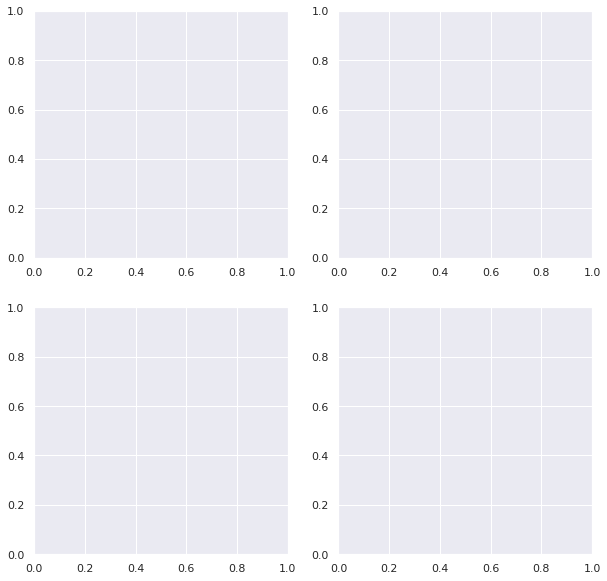

In [93]:
fig, axes = plt.subplots(2,2, figsize=(10,10))


for i,data in df.head().iloc[:,:-1].select_dtypes(include=np.number).iterrows():
    axes[i].data[1].plot()

lambda_1
lambda_2
lambda_3
lambda_4


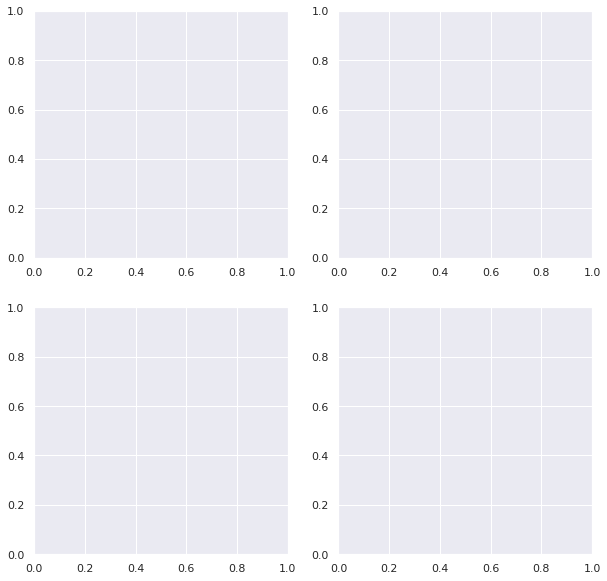

In [57]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

for ax, element in zip(axes.flat, df.head().select_dtypes(include=np.number).iloc[:,:-1]):
    
    print(element)

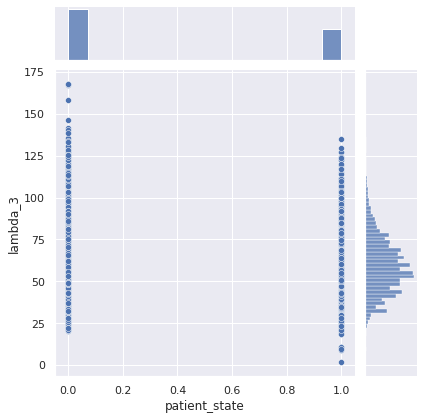

In [176]:
sns.jointplot(data=df, x="patient_state", y="lambda_3")

In [160]:
g = df.value_counts("cell_type")
g = df.value_counts("patient_state")

g

patient_state
sain      4466
malade    2731
dtype: int64

In [86]:
from utils import hello_world
hello_world()

hello world


In [198]:

from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
sss.get_n_splits(df["lambda_1"], df["patient_state"])

print(sss)


for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.2,
            train_size=None)
TRAIN: [2 5 1 3] TEST: [0 4]
TRAIN: [0 4 3 1] TEST: [2 5]
TRAIN: [0 4 3 1] TEST: [2 5]
